In [1]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [2]:
!pip install Pillow
!pip install glob

ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [3]:
!pip install torch torchvision

fatal: destination path 'PlantVillage-Dataset' already exists and is not an empty directory.


In [4]:
# Access the cloned repository
import os
repository_path = "C:/Users/vykun/Downloads/PlantVillage-Dataset/raw"
os.chdir(repository_path)

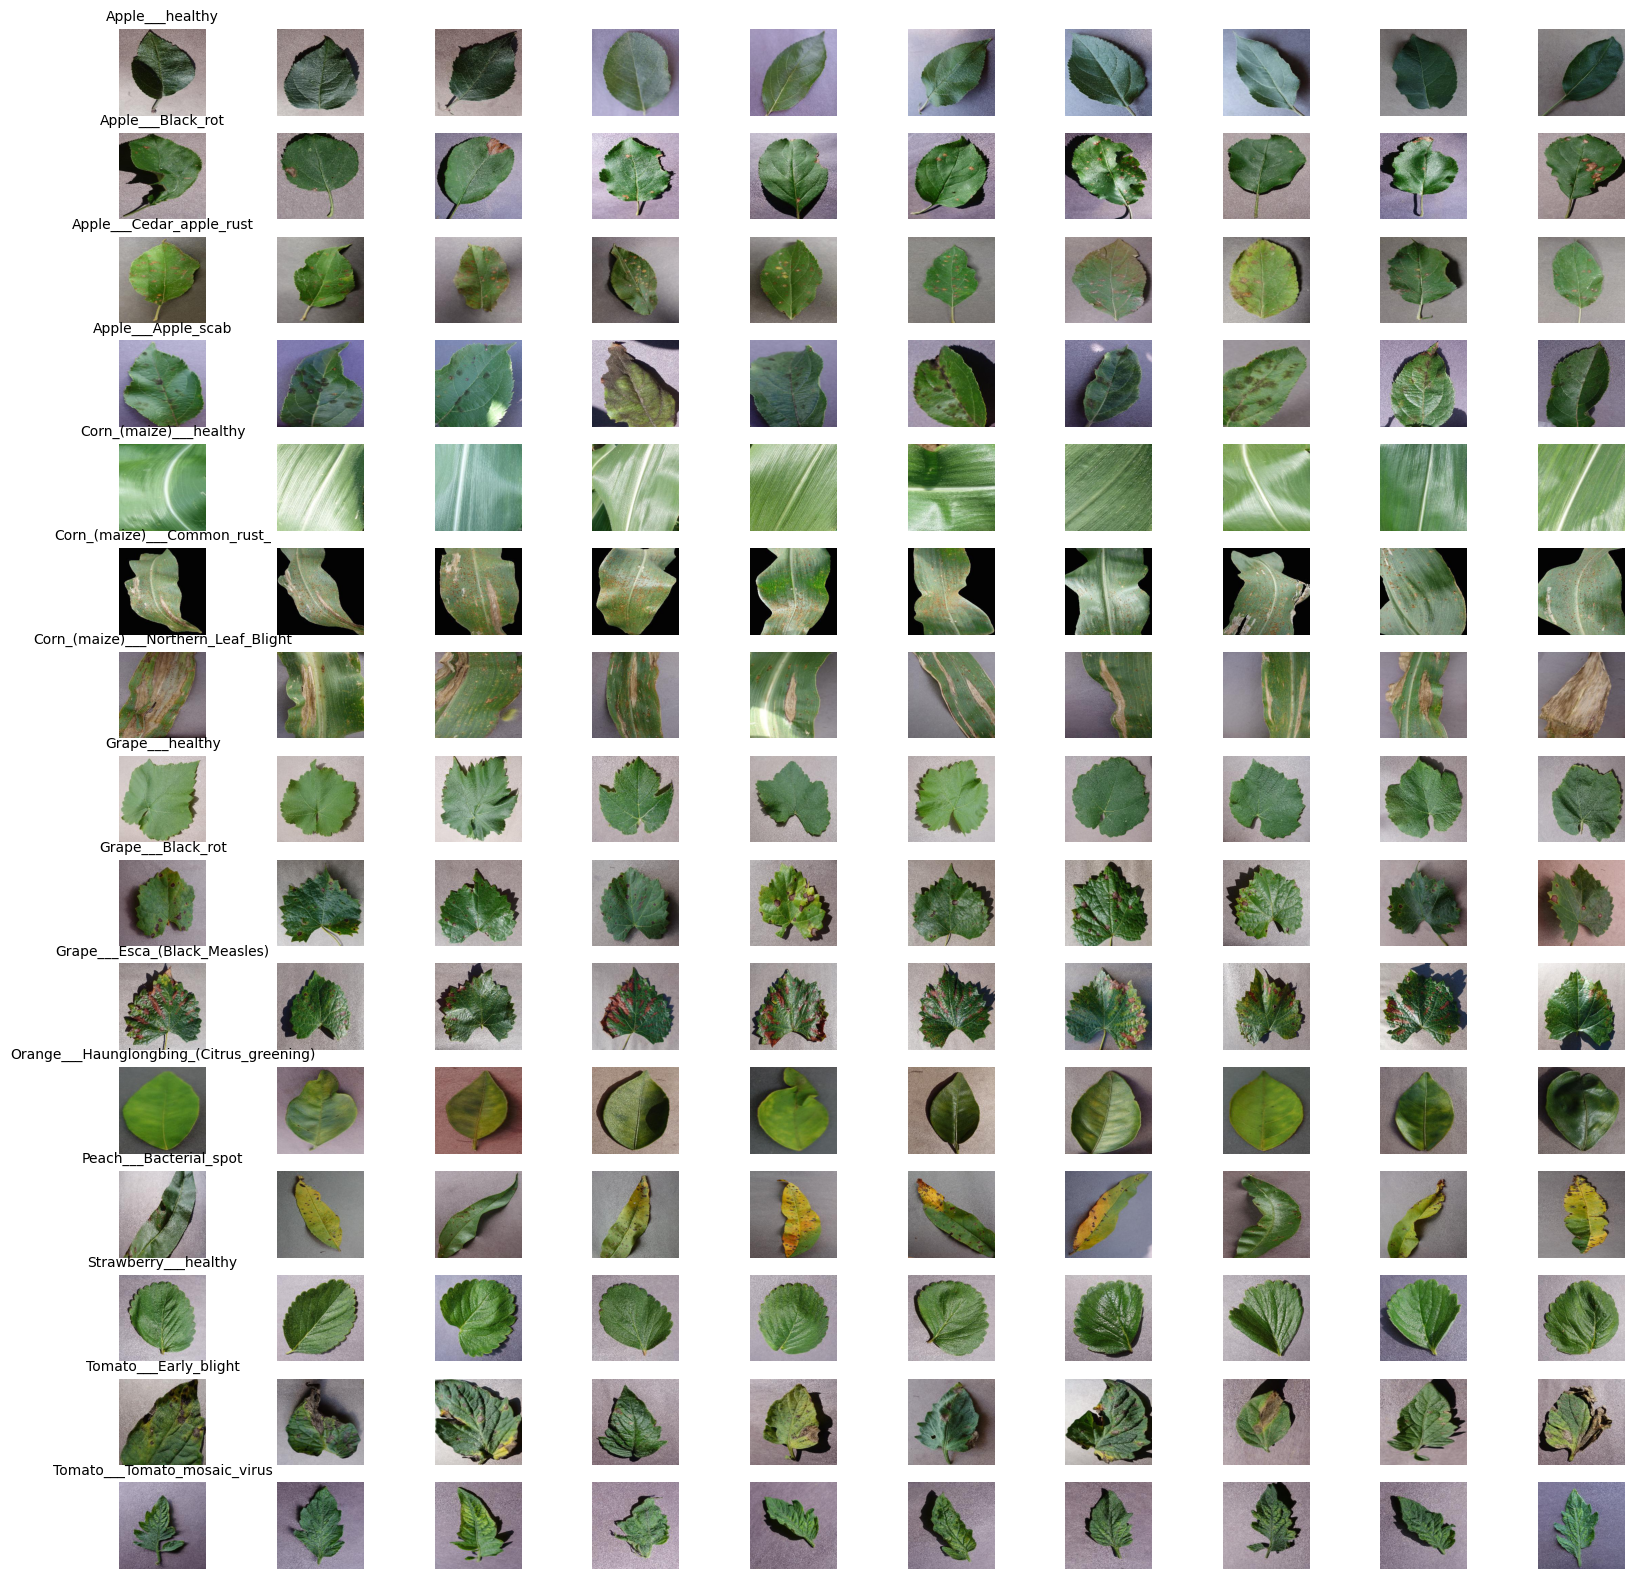

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob

# Define the list of folders
folders = ["C:/Users/vykun/Downloads/PlantVillage-Dataset/raw/color/Apple___healthy",
            "C:/Users/vykun/Downloads/PlantVillage-Dataset/raw/color/Apple___Black_rot",
            "C:/Users/vykun/Downloads/PlantVillage-Dataset/raw/color/Apple___Cedar_apple_rust",
            "C:/Users/vykun/Downloads/PlantVillage-Dataset/raw/color/Apple___Apple_scab",
            "C:/Users/vykun/Downloads/PlantVillage-Dataset/raw/color/Corn_(maize)___healthy",
            "C:/Users/vykun/Downloads/PlantVillage-Dataset/raw/color/Corn_(maize)___Common_rust_",
            "C:/Users/vykun/Downloads/PlantVillage-Dataset/raw/color/Corn_(maize)___Northern_Leaf_Blight",
            "C:/Users/vykun/Downloads/PlantVillage-Dataset/raw/color/Grape___healthy",
            "C:/Users/vykun/Downloads/PlantVillage-Dataset/raw/color/Grape___Black_rot",
            "C:/Users/vykun/Downloads/PlantVillage-Dataset/raw/color/Grape___Esca_(Black_Measles)",
           "C:/Users/vykun/Downloads/PlantVillage-Dataset/raw/color/Orange___Haunglongbing_(Citrus_greening)",
           "C:/Users/vykun/Downloads/PlantVillage-Dataset/raw/color/Peach___Bacterial_spot",
           "C:/Users/vykun/Downloads/PlantVillage-Dataset/raw/color/Strawberry___healthy",
           "C:/Users/vykun/Downloads/PlantVillage-Dataset/raw/color/Tomato___Early_blight",
           "C:/Users/vykun/Downloads/PlantVillage-Dataset/raw/color/Tomato___Tomato_mosaic_virus"]

# Define the number of images to display from each folder
num_images = 10

# Create a figure
fig = plt.figure(figsize=(20, 20))

# Iterate over each folder
for i, folder in enumerate(folders):
    # List all files in the folder
    image_files = glob.glob(os.path.join(folder, '*'))

    # Filter out directories
    image_files = [f for f in image_files if os.path.isfile(f)]

    # Iterate over each image file
    for j, image_file in enumerate(image_files[:num_images]):
        # Open the image
        image = Image.open(image_file)

        # Add a subplot to the figure
        ax = fig.add_subplot(len(folders), num_images, i*num_images + j + 1)

        # Display the image
        ax.imshow(image)

        # Turn off axis
        ax.axis('off')

        # Add a label to the image
        if j == 0:
            ax.set_title(folder.split('/')[-1], fontsize=10)

# Show the figure
plt.show()


In [6]:
import os

# Get the current working directory
cwd = os.getcwd()

# List all folders in the current working directory
folders = [f for f in os.listdir(cwd) if os.path.isdir(os.path.join(cwd, f))]

# Print the list of folders
print(folders)

['color', 'grayscale', 'segmented']


In [7]:
!pip install tensorflow

In [8]:
import os
import shutil
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define the data directories
data_dirs = ['C:/Users/vykun/Downloads/PlantVillage-Dataset/raw/grayscale',
             'C:/Users/vykun/Downloads/PlantVillage-Dataset/raw/segmented',
             'C:/Users/vykun/Downloads/PlantVillage-Dataset/raw/color']

# Define the directories for the training, validation, and test splits
train_dir = '/content/train'
val_dir = '/content/val'
test_dir = '/content/test'

# Create the directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split the data into training, validation, and test sets
for data_dir in data_dirs:
    for class_dir in os.listdir(data_dir):
        os.makedirs(os.path.join(train_dir, class_dir), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_dir), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_dir), exist_ok=True)

        class_files = os.listdir(os.path.join(data_dir, class_dir))
        np.random.shuffle(class_files)

        train_files, test_files = train_test_split(class_files, test_size=0.2, random_state=42)
        train_files, val_files = train_test_split(train_files, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

        for file in train_files:
            shutil.copy(os.path.join(data_dir, class_dir, file), os.path.join(train_dir, class_dir, file))
        for file in val_files:
            shutil.copy(os.path.join(data_dir, class_dir, file), os.path.join(val_dir, class_dir, file))
        for file in test_files:
            shutil.copy(os.path.join(data_dir, class_dir, file), os.path.join(test_dir, class_dir, file))

# Define the image dimensions
img_width, img_height = 224, 224
num_classes = len(os.listdir(train_dir))
batch_size = 32
epochs = 20

# Define the ImageDataGenerators for training, validation, and test sets
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Added vertical flip
    rotation_range=20)  # Added rotation

val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Added dense layer
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer

# Model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=val_generator.samples // batch_size)

# Evaluate the model on test data

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")


Found 83387 images belonging to 38 classes.
Found 37392 images belonging to 38 classes.
Found 37400 images belonging to 38 classes.
Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2605/2605 ━━━━━━━━━━━━━━━━━━━━ 4660s 2s/step - accuracy: 0.1974 - loss: 3.0400 - val_accuracy: 0.3037 - val_loss: 2.5334
Epoch 2/20
   1/2605 ━━━━━━━━━━━━━━━━━━━━ 47:42 1s/step - accuracy: 0.2812 - loss: 2.4351

C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2605/2605 ━━━━━━━━━━━━━━━━━━━━ 2s 306us/step - accuracy: 0.2812 - loss: 2.4351 - val_accuracy: 0.1875 - val_loss: 2.7157
Epoch 3/20
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 4372s 2s/step - accuracy: 0.3372 - loss: 2.3827 - val_accuracy: 0.3443 - val_loss: 2.3659
Epoch 4/20
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 2s 243us/step - accuracy: 0.4375 - loss: 2.2677 - val_accuracy: 0.2500 - val_loss: 3.0635
Epoch 5/20
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 4370s 2s/step - accuracy: 0.3850 - loss: 2.1772 - val_accuracy: 0.3599 - val_loss: 2.2682
Epoch 6/20
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 2s 286us/step - accuracy: 0.4688 - loss: 1.9397 - val_accuracy: 0.1875 - val_loss: 2.7916
Epoch 7/20
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 4654s 2s/step - accuracy: 0.4176 - loss: 2.0385 - val_accuracy: 0.4172 - val_loss: 2.0207
Epoch 8/20
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 2s 285us/step - accuracy: 0.3750 - loss: 1.9862 - val_accuracy: 0.5000 - val_loss: 1.6214
Epoch 9/20
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 4610s 2s/step - accuracy: 0.4326 - loss: 1.96